In [83]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Format demo df, merge with greendf to get park count

In [84]:
grngdf = gpd.read_file('data/sgf_greenspace_density.shp')

demodf = pd.read_excel('data/Smart Map Search.xlsx')

In [85]:
new_cols = ['geoid', 'median_hhs_income',
                  'avg_health_care', 'pct_hhs_disb',
                  'minor_pop_no_health_ins',
                  'adult_pop_no_health_ins']
rename_dict = {demodf.columns[i]:new_cols[i] for i in range(len(demodf.columns))}
rename_dict

{'Block Group': 'geoid',
 '2020 Median Household Income': 'median_hhs_income',
 '2020 Health Care (Avg)': 'avg_health_care',
 '2018 HHs w/1+ Persons w/Disability (ACS 5-Yr) (%)': 'pct_hhs_disb',
 '2018 Pop <19: No Health Insurance (ACS 5-Yr)': 'minor_pop_no_health_ins',
 '2018 Pop 35-64: No Health Insurance (ACS 5-Yr)': 'adult_pop_no_health_ins'}

In [86]:
demodf = demodf.rename(columns=rename_dict)
demodf['geoid'] = demodf['geoid'].astype(str).apply(lambda _: _.replace('.', ''))

grngdf = grngdf.merge(demodf, left_on='geoid', right_on='geoid', how='inner')

### Viz

In [87]:
plotdf = grngdf[['park_count',  'median_hhs_income', 'avg_health_care',
                 'pct_hhs_disb', 'minor_pop_no_health_ins', 'adult_pop_no_health_ins']]

#### feature relationships

strong linear relationship between median household income and avg_health_care

we dont really see any obvious relationships with the "park count". the park data could possibly be refined -- i gathered points for school fields that are often open to the public. Filtering out the school greenspace might give some interesting results. 


In [89]:
plotdf.corr()

,park_count,median_hhs_income,avg_health_care,pct_hhs_disb,minor_pop_no_health_ins,adult_pop_no_health_ins
park_count,1.0000,-0.2863,-0.2564,0.0477,0.0124,0.0025
median_hhs_income,-0.2863,1.0000,0.9523,-0.3503,-0.0774,-0.3511
avg_health_care,-0.2564,0.9523,1.0000,-0.3045,-0.0487,-0.2924
pct_hhs_disb,0.0477,-0.3503,-0.3045,1.0000,-0.0308,0.2629
minor_pop_no_health_ins,0.0124,-0.0774,-0.0487,-0.0308,1.0000,0.4261
adult_pop_no_health_ins,0.0025,-0.3511,-0.2924,0.2629,0.4261,1.0000


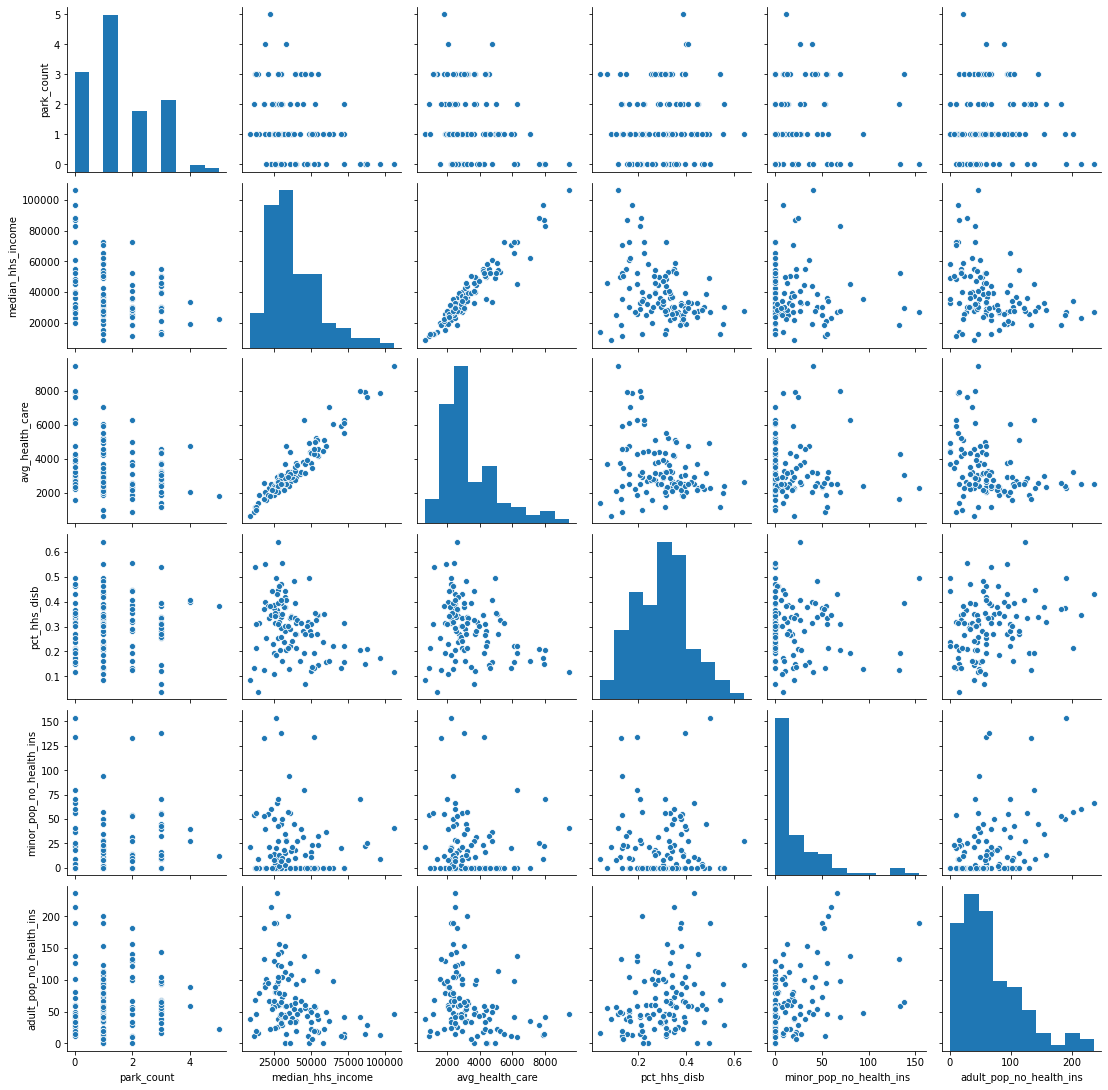

In [90]:
sns.pairplot(plotdf)

#### look specifically at block groups with lower income

avg health care and pct hhs disb look more gaussian now (:

In [71]:
grngdf.loc[grngdf['median_hhs_income']<grngdf['median_hhs_income'].mean()].shape

(68, 19)

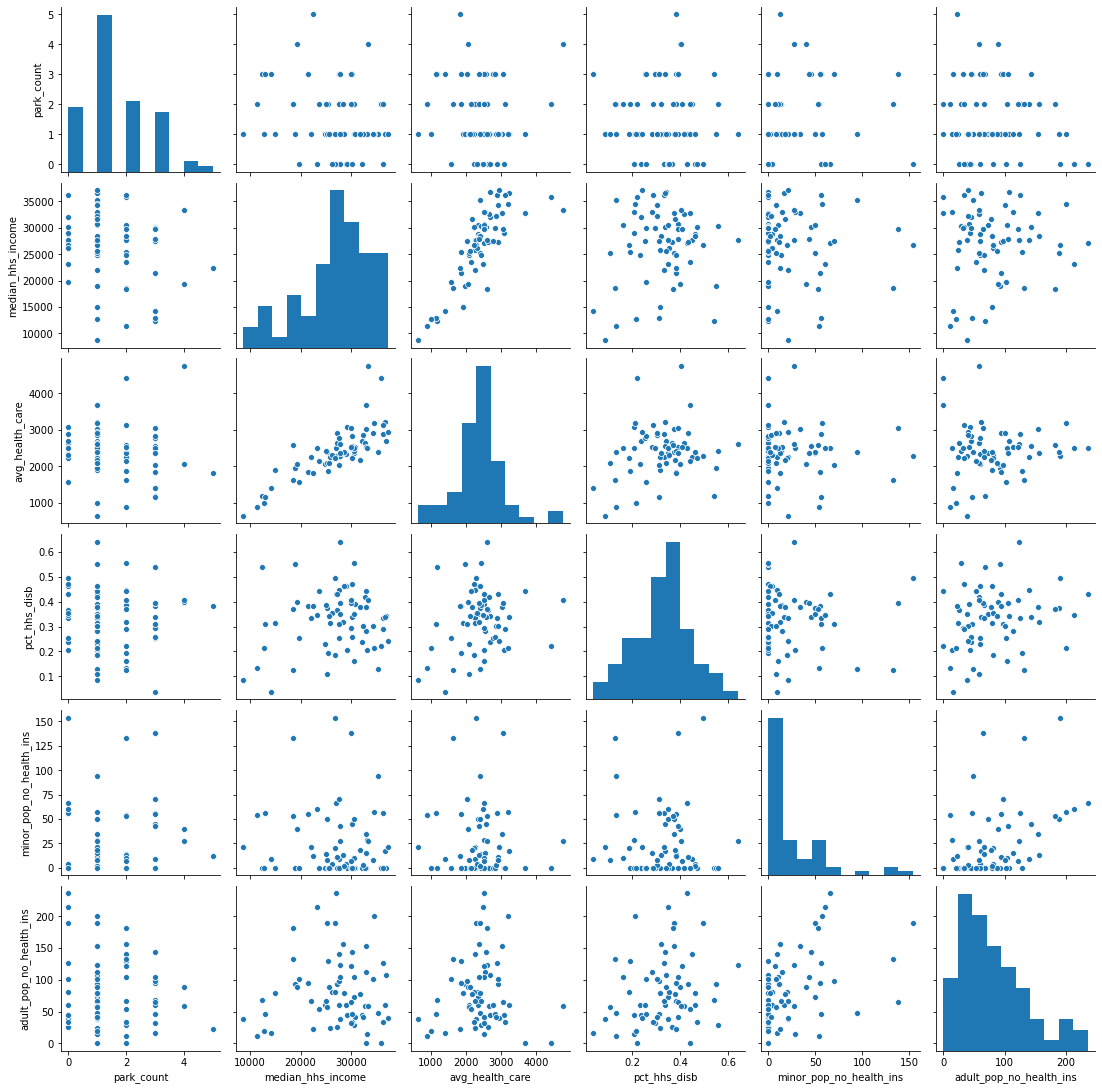

In [74]:
sns.pairplot(plotdf.loc[plotdf['median_hhs_income']<plotdf['median_hhs_income'].mean()])